# September 10 - Training results on the new dataset

In [49]:
# Imports
import sys
import os
import time
import math

# Add the path to the parent directory to augment search for module
par_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
if par_dir not in sys.path:
    sys.path.append(par_dir)
    
# Plotting import
import matplotlib.pyplot as plt
import numpy as np

# Import the utils for plotting the metrics
from plot_utils import plot_utils
from plot_utils import notebook_utils_2

## $\beta$-VAE and VAE (latent dimensions=128) training

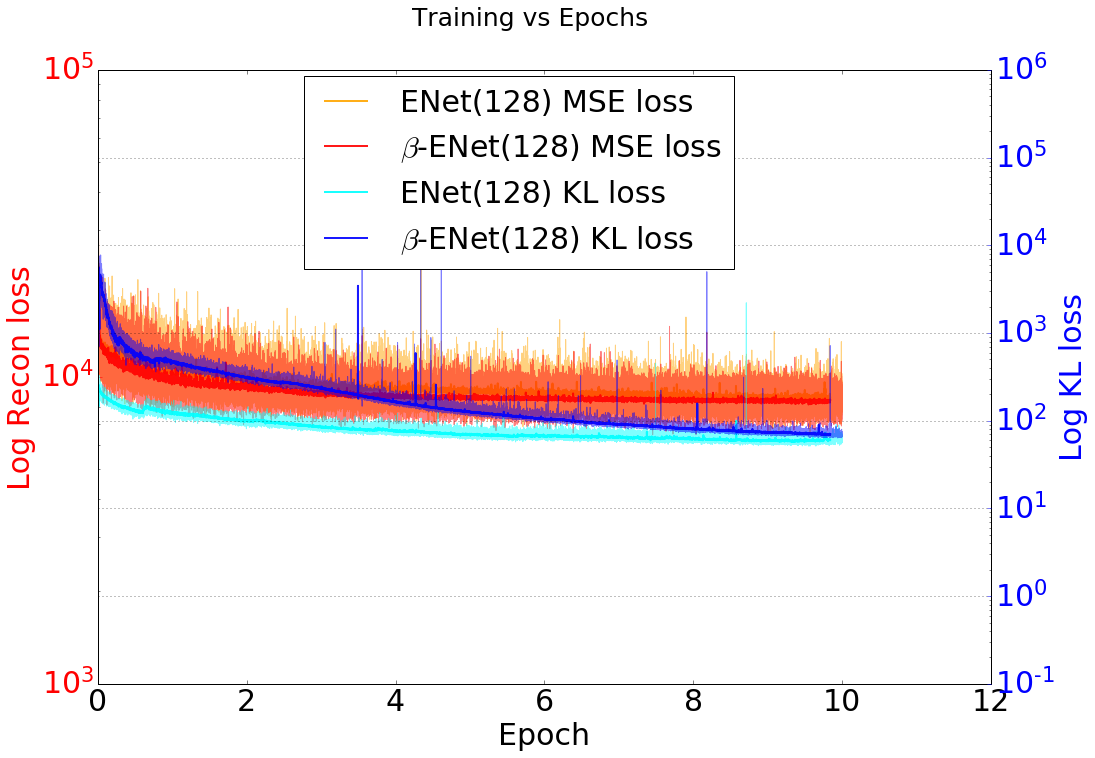

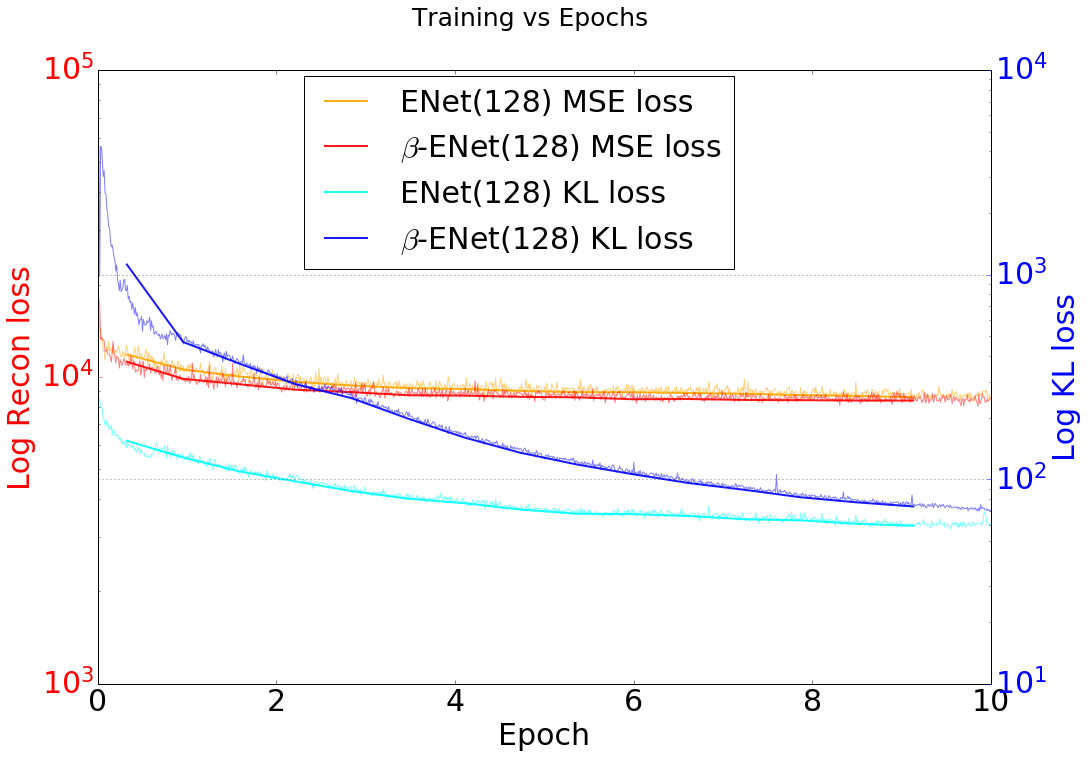

In [23]:
run_ids = ["20190909_190620", "20190909_183138"]
model_ids = ["ENet(128)", r"$\beta$-ENet(128)"]
dump_dirs = ["/home/akajal/WatChMaL/VAE/dumps/" + run_id + "/" for run_id in run_ids]
training_logs = [dump_dir + "log_train.csv" for dump_dir in dump_dirs]
val_logs = [dump_dir + "log_val.csv" for dump_dir in dump_dirs]
    
# Plot training log
plot_utils.plot_vae_training(training_logs, model_ids, 
                             {model_ids[0]:["orange", "cyan"], model_ids[1]:["red", "blue"]},
                             downsample_interval=64,
                             legend_loc=(0.65,0.88),
                             show_plot=True)

# Plot validation log
plot_utils.plot_vae_training(val_logs, model_ids, 
                             {model_ids[0]:["orange", "cyan"], model_ids[1]:["red", "blue"]},
                             downsample_interval=64,
                             legend_loc=(0.65,0.88),
                             show_plot=True)

## Planar flow training (using $\beta$ annealing)

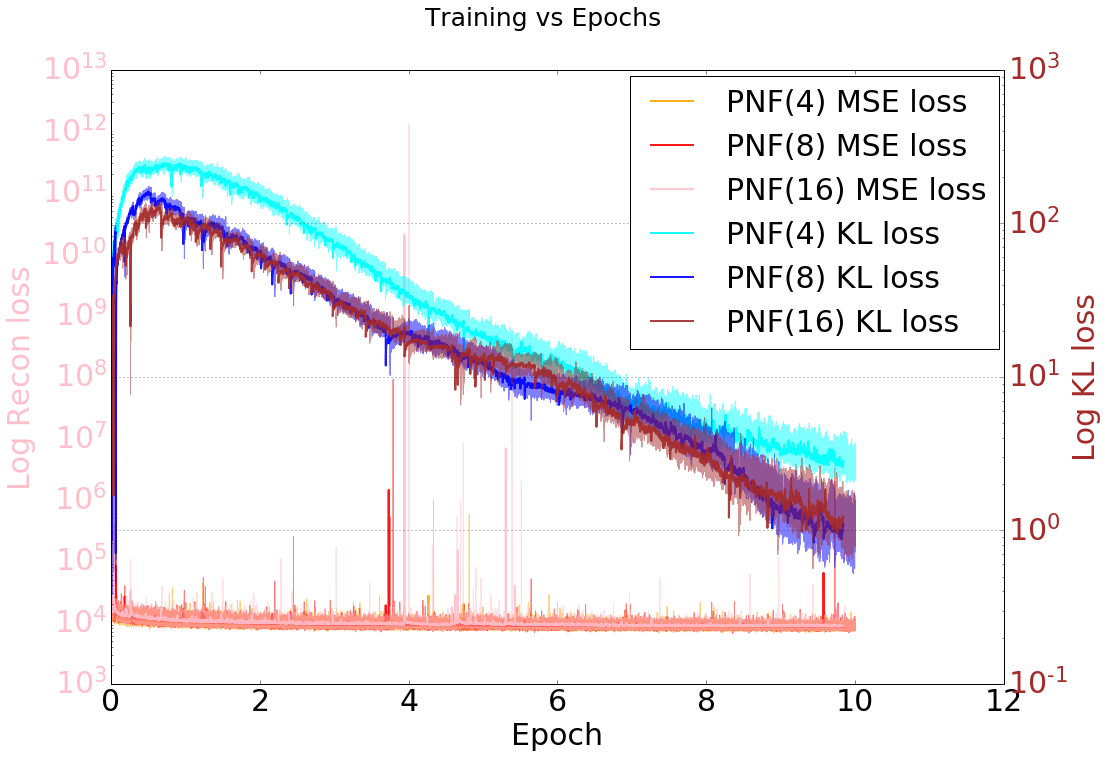

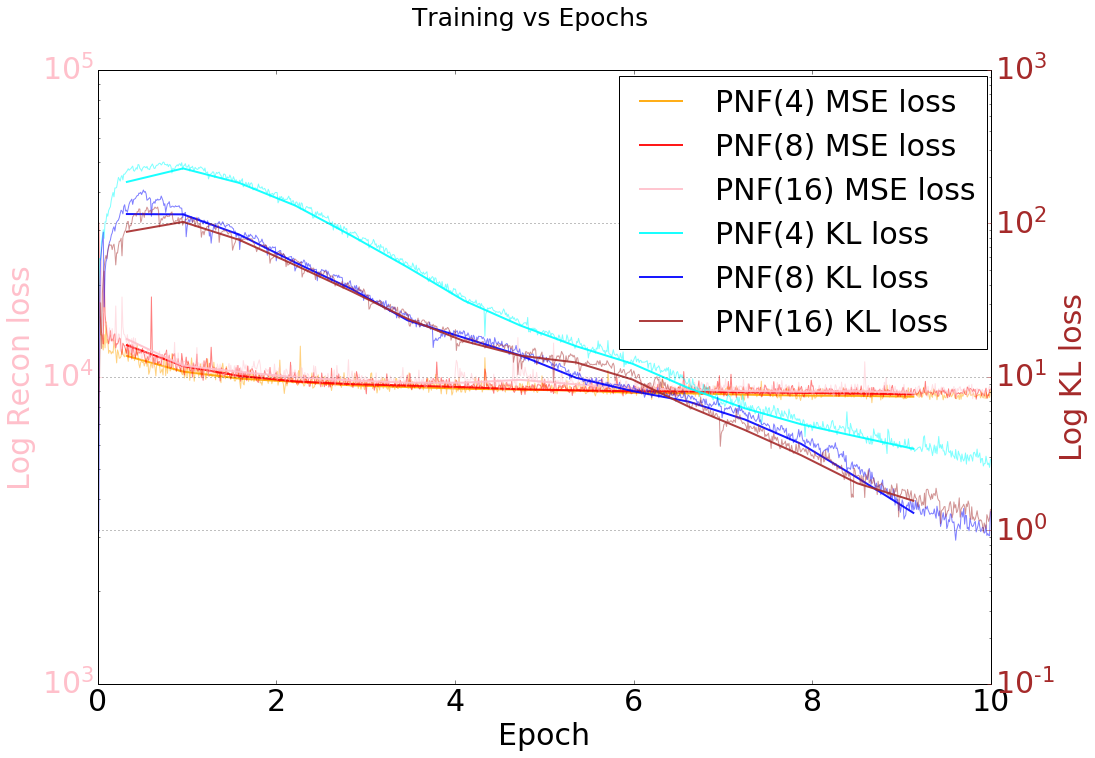

In [36]:
run_ids = ["20190909_223147", "20190909_223333", "20190909_215637"]
model_ids = ["PNF(4)", "PNF(8)", "PNF(16)"]
dump_dirs = ["/home/akajal/WatChMaL/VAE/dumps/" + run_id + "/" for run_id in run_ids]
training_logs = [dump_dir + "log_train.csv" for dump_dir in dump_dirs]
val_logs = [dump_dir + "log_val.csv" for dump_dir in dump_dirs]
    
# Plot training log
plot_utils.plot_vae_training(training_logs, model_ids, 
                             {model_ids[0]:["orange", "cyan"], model_ids[1]:["red", "blue"], model_ids[2]:["pink", "brown"]},
                             downsample_interval=64,
                             legend_loc=(0.88,0.88),
                             show_plot=True)

# Plot validation log
plot_utils.plot_vae_training(val_logs, model_ids, 
                             {model_ids[0]:["orange", "cyan"], model_ids[1]:["red", "blue"], model_ids[2]:["pink", "brown"]},
                             downsample_interval=64,
                             legend_loc=(0.87,0.88),
                             show_plot=True)

In [ ]:
run_ids = ["20190910_184445", "20190910_184617", "20190909_225041"]
model_ids = ["PNF(64)", "PNF(128)", "PNF(256)"]
dump_dirs = ["/home/akajal/WatChMaL/VAE/dumps/" + run_id + "/" for run_id in run_ids]
training_logs = [dump_dir + "log_train.csv" for dump_dir in dump_dirs]
val_logs = [dump_dir + "log_val.csv" for dump_dir in dump_dirs]
    
# Plot training log
plot_utils.plot_vae_training(training_logs, model_ids, 
                             {model_ids[0]:["orange", "cyan"], model_ids[1]:["red", "blue"], model_ids[2]:["pink", "brown"]},
                             downsample_interval=64,
                             legend_loc=(0.88,0.88),
                             show_plot=True)

# Plot validation log
plot_utils.plot_vae_training(val_logs, model_ids, 
                             {model_ids[0]:["orange", "cyan"], model_ids[1]:["red", "blue"], model_ids[2]:["pink", "brown"]},
                             downsample_interval=64,
                             legend_loc=(0.87,0.88),
                             show_plot=True)

## Pure classifier training

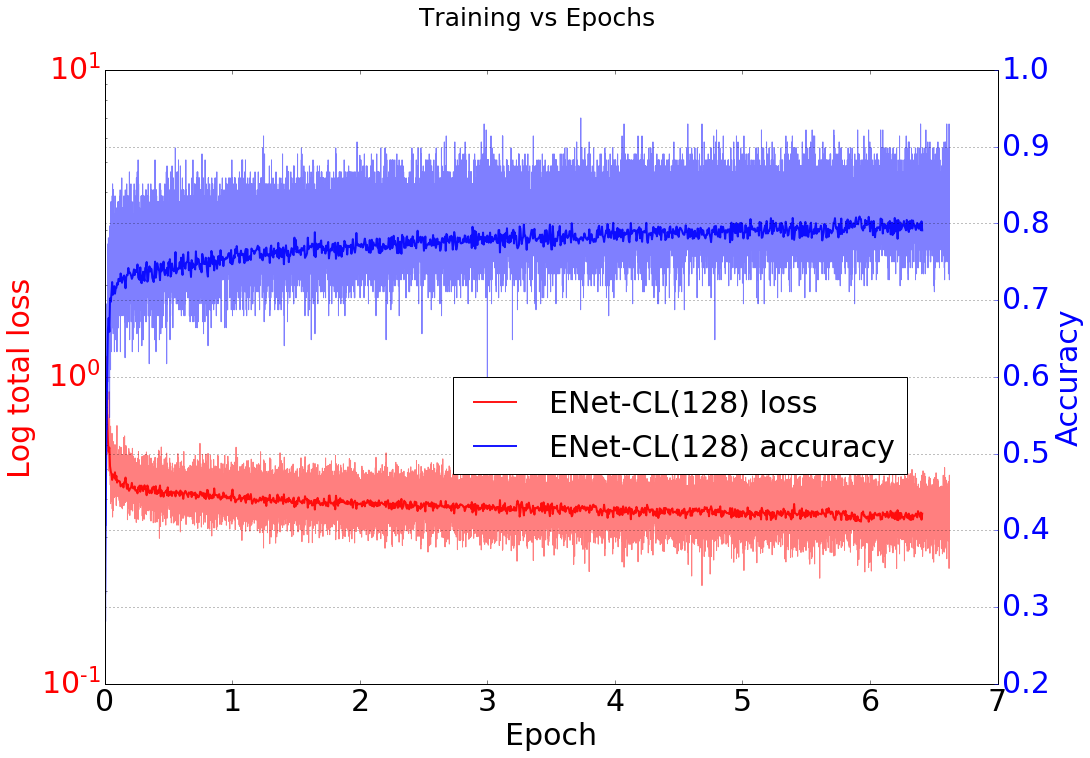

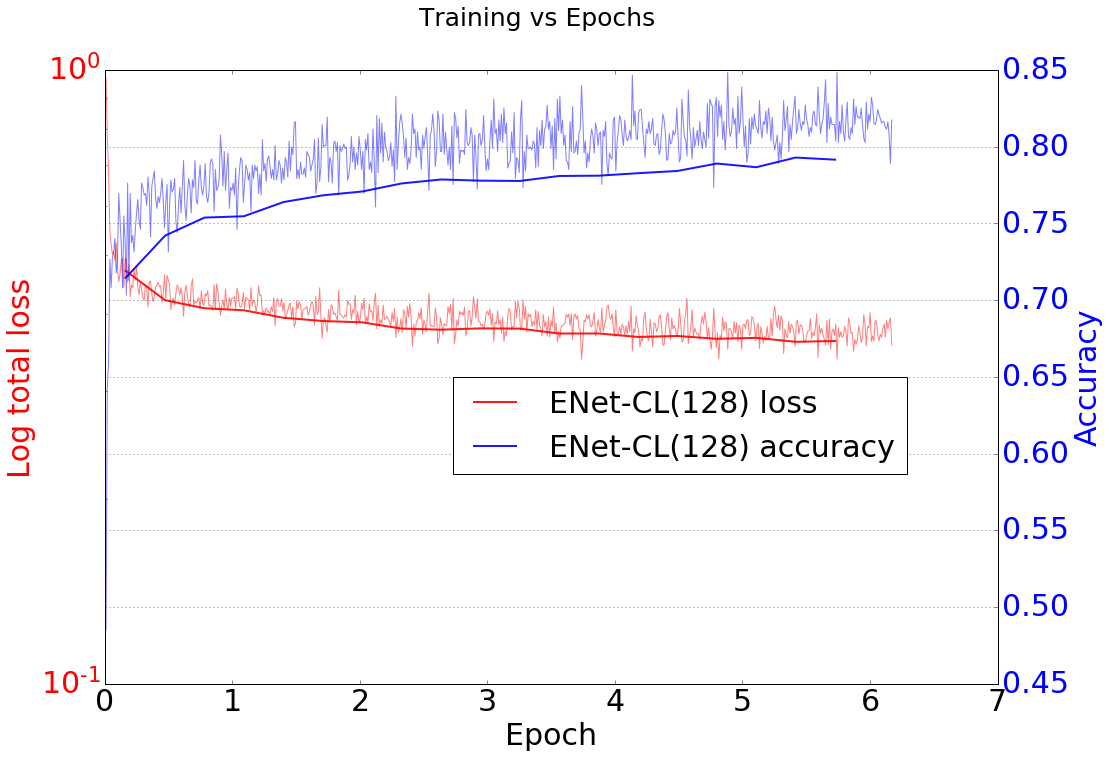

In [55]:
# Using the absolute path
run_id = "20190911_021551"
dump_dir = "/home/akajal/WatChMaL/VAE/dumps/" + run_id + "/"
model_name = "ENet-CL(128)"
training_log, val_log = dump_dir + "log_train.csv", dump_dir + "log_val.csv"

# Plot training log
plot_utils.plot_training([training_log], [model_name], 
                         {model_name:["red", "blue"]},
                         downsample_interval=32, show_plot=True)

# Plot validation log
plot_utils.plot_training([val_log], [model_name], 
                         {model_name:["red", "blue"]},
                         downsample_interval=32, show_plot=True)

## Validate the 128 latent dimensional VAE ( both with and without beta annealing )

In [51]:
latent_dims = [128, 128]
dumps = ["20190911_025430", "20190911_023041"]

# First check that all the indices from the test validation set exist in all the dumps

ldump_idx_arr = None

# Iterate over the dumps and check the indices
for latent_dim, dump in zip(latent_dims, dumps):
    print("----------------------------------------------------")
    print("Reading metrics from VAE with {0} latent dimensions :".format(latent_dim))
    print("----------------------------------------------------")
    
    dump_npz_path = "/home/akajal/WatChMaL/VAE/dumps/{0}/val_valid_iteration_metrics.npz".format(dump)
    dump_npz_arr = np.load(dump_npz_path)
    
    dump_indices = np.sort(dump_npz_arr["indices"])
    
    if ldump_idx_arr is not None:
        if not np.array_equal(dump_indices, ldump_idx_arr):
            print("Index array for latent dims {0} not equal to all the other.".format(latent_dim))
        else:
            print("Index array equal to the first index array")
    else:
        ldump_idx_arr = dump_indices

----------------------------------------------------
Reading metrics from VAE with 128 latent dimensions :
----------------------------------------------------
----------------------------------------------------
Reading metrics from VAE with 128 latent dimensions :
----------------------------------------------------
Index array equal to the first index array


In [54]:
# Collect the metrics for plotting as well
recon_loss_values, kl_loss_values = [], []
recon_std_values, kl_std_values = [], []
recon_stderr_values, kl_stderr_values = [], []

# Iterate over the dumps and check the indices
for latent_dim, dump in zip(latent_dims, dumps):
    print("\n----------------------------------------------------")
    print("Printing metrics for VAE with {0} latent dimensions :".format(latent_dim))
    print("----------------------------------------------------")
    
    dump_npz_path = "/home/akajal/WatChMaL/VAE/dumps/{0}/val_valid_iteration_metrics.npz".format(dump)
    npz_arr = np.load(dump_npz_path)
    
    dump_recon_loss, dump_kl_loss = npz_arr["recon_loss"], npz_arr["kl_loss"]
    
    mean_recon_loss, std_recon_loss = np.mean(dump_recon_loss), np.std(dump_recon_loss)
    stderr_recon_loss = std_recon_loss/math.sqrt(dump_recon_loss.shape[0])
    
    recon_loss_values.append(mean_recon_loss)
    recon_std_values.append(std_recon_loss)
    recon_stderr_values.append(stderr_recon_loss)
    
    mean_kl_loss, std_kl_loss = np.mean(dump_kl_loss), np.std(dump_kl_loss)
    stderr_kl_loss = std_kl_loss/math.sqrt(dump_kl_loss.shape[0])
    
    kl_loss_values.append(mean_kl_loss)
    kl_std_values.append(std_kl_loss)
    kl_stderr_values.append(stderr_kl_loss)
    
    print("Recon Loss metrics")
    print("Mean Recon loss : {0}".format(mean_recon_loss))
    print("Std Recon loss : {0}".format(std_recon_loss))
    print("Stderr Recon loss : {0}\n".format(stderr_recon_loss))
    
    print("KL Loss metrics")
    print("Mean KL loss : {0}".format(mean_kl_loss))
    print("Std KL loss : {0}".format(std_kl_loss))
    print("Stderr KL loss : {0}".format(stderr_kl_loss))


----------------------------------------------------
Printing metrics for VAE with 128 latent dimensions :
----------------------------------------------------
Recon Loss metrics
Mean Recon loss : 8683.0078125
Std Recon loss : 5664.74609375
Stderr Recon loss : 5.975344236294266

KL Loss metrics
Mean KL loss : 61.39522933959961
Std KL loss : 28.87569236755371
Stderr KL loss : 0.030458947162316206

----------------------------------------------------
Printing metrics for VAE with 128 latent dimensions :
----------------------------------------------------
Recon Loss metrics
Mean Recon loss : 8447.5615234375
Std Recon loss : 5413.81103515625
Stderr Recon loss : 5.710650403377965

KL Loss metrics
Mean KL loss : 70.2118911743164
Std KL loss : 24.518503189086914
Stderr KL loss : 0.025862853213335705
